In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
from scipy.optimize import fsolve 
import math

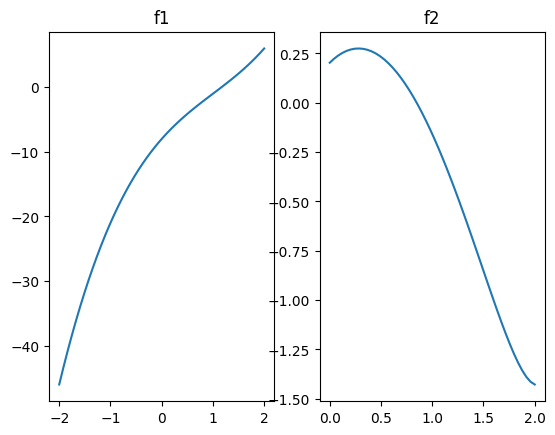

In [2]:
def f1(x):
    return x**3 - 3*x**2 + 9*x - 8
def f2(x):
    return np.tan(0.5*x + 0.2) - x**2
x1 = np.linspace(-2, 2)
x2 = np.linspace(0.001, 2)

plt.figure()
plt.subplot(121)
plt.plot(x1, f1(x1))
plt.title('f1')

plt.subplot(122)
plt.plot(x2, f2(x2))
plt.title('f2')
plt.show()

In [3]:
root1 = fsolve(f1, [1])[0]
root2 = fsolve(f2, [1])[0]
print(root1, root2)


1.1659055841222128 0.8489184041049849


In [24]:
def f(x):
    return x**3 - 3*x**2 + 9*x - 8 
def phi(x):
    return (8 - x**3 + 3*x**2) / 9
def fder(x):
    return 3*x**2 - 6*x + 9

def dihotomia(a, b, eps, n=1): 
    while 1:
        c = (a + b) / 2
        print('Шаг', n, ' x_n', ' = ', c, '        |x_n - x*| = ', abs(c - root1))
        if abs(a - b) < eps or f(c) == 0: 
            return c
        elif f(c) * f(a) < 0:
            return dihotomia(a, c, eps, n+1)
        else:
            return dihotomia(c, b, eps, n+1)
        
def secant(a, b, eps, n=1): 
    while 1:
        c = (a * f(b) - b * f(a)) / (f(b) - f(a))
        print('Шаг', n, ' x_n', ' = ', c, '        |x_n - x*| = ', abs(c - root1))
        if abs(a - b) < eps or np.isclose(0,f(c)): 
            return c
        elif f(c) * f(a) < 0:
            return secant(a, c, eps, n+1)
        else:
            return secant(c, b, eps, n+1)
        
def Newton(x, eps, n = 1):
    next_x = x - (f(x)/fder(x))
    while 1:
        print('Шаг', n, 'phi_n = ', next_x, '  x_n', ' = ', x, '        |x_n - x*| = ', abs(x - root1))
        
        if abs(next_x - x) < eps or f(next_x) == 0: 
            return (next_x, n)
        else:
            return Newton(next_x, eps, n + 1)
        
def Newton_modified(x, eps, x0, n = 1): 
    next_x = x - (f(x)/fder(x0))
    while 1:
        print('Шаг', n, 'phi_n = ', next_x, '  x_n', ' = ', x, '        |x_n - x*| = ', abs(x - root1))
        if abs(next_x - x) < eps or f(next_x) == 0:
            return (next_x, n)
        else:
            return Newton_modified(next_x, eps, x0, n + 1)

def MPI(x, eps, n = 1): 
    next_x = phi(x)
    while 1:
        print('Шаг', n, 'phi_n = ', next_x, '  x_n', ' = ', x, '        |x_n - x*| = ', abs(x - root1))
        if abs(next_x - x) < eps or f(next_x) == 0:
            return (next_x, n)
        else:
            return MPI(next_x, eps, n + 1)
        
eps = 0.001
accuracy = 8

print('\t \t \t Функция 1:')
print('\t \t \t Дихотомия:')
print('Результат дихотомии: ', round(dihotomia(0.1, 2, eps), accuracy))
print('\t \t \t Метод секущих:')
print('Результат метода секущих:', round(secant(0.1, 2, eps), accuracy))
print('\t \t \t Метод Ньютона:')
answer = Newton(1, eps)
print('Результат метода Ньютона:', round(answer[0], accuracy))
print('\t \t \t Модифицированный метод Ньютона:')
answer = Newton_modified(3, eps, 3)
print('Результат модифицированного метода Ньютона: ', round(answer[0], accuracy))
print('\t \t \t МПИ:')
answer = MPI(0, eps)
print('Результат МПИ: ', round(answer[0], accuracy), answer[1])

	 	 	 Функция 1:
	 	 	 Дихотомия:
Шаг 1  x_n  =  1.05         |x_n - x*| =  0.11590558412221275
Шаг 2  x_n  =  1.525         |x_n - x*| =  0.3590944158777871
Шаг 3  x_n  =  1.2875         |x_n - x*| =  0.1215944158777873
Шаг 4  x_n  =  1.1687500000000002         |x_n - x*| =  0.0028444158777873874
Шаг 5  x_n  =  1.109375         |x_n - x*| =  0.05653058412221279
Шаг 6  x_n  =  1.1390625         |x_n - x*| =  0.0268430841222127
Шаг 7  x_n  =  1.1539062500000001         |x_n - x*| =  0.011999334122212657
Шаг 8  x_n  =  1.1613281250000003         |x_n - x*| =  0.004577459122212524
Шаг 9  x_n  =  1.1650390625000002         |x_n - x*| =  0.0008665216222125682
Шаг 10  x_n  =  1.16689453125         |x_n - x*| =  0.0009889471277872985
Шаг 11  x_n  =  1.1659667968750003         |x_n - x*| =  6.121275278747618e-05
Шаг 12  x_n  =  1.1655029296875004         |x_n - x*| =  0.000402654434712435
Результат дихотомии:  1.16550293
	 	 	 Метод секущих:
Шаг 1  x_n  =  1.1316931982633864         |x_n - x*|

In [27]:
def f(x):
    return np.tan(0.5*x + 0.2) - x**2
def phi(x):
    return (np.tan(0.5*x + 0.2))**(1/2)
def fder(x):
    return 1/(2*((np.cos(1/2 * x + 1/5)) ** 2)) - 2*x

def dihotomia(a, b, eps, n=1): 
    while 1:
        c = (a + b) / 2
        print('Шаг', n, ' x_n', ' = ', c, '        |x_n - x*| = ', abs(c - root1))
        if abs(a - b) < eps or f(c) == 0: 
            return c
        elif f(c) * f(a) < 0:
            return dihotomia(a, c, eps, n+1)
        else:
            return dihotomia(c, b, eps, n+1)
        
def secant(a, b, eps, n=1): 
    while 1:
        c = (a * f(b) - b * f(a)) / (f(b) - f(a))
        print('Шаг', n, ' x_n', ' = ', c, '        |x_n - x*| = ', abs(c - root1))
        if abs(a - b) < eps or np.isclose(0,f(c)): 
            return c
        elif f(c) * f(a) < 0:
            return secant(a, c, eps, n+1)
        else:
            return secant(c, b, eps, n+1)
        
def Newton(x, eps, n = 1):
    next_x = x - (f(x)/fder(x))
    while 1:
        print('Шаг', n, 'phi_n = ', next_x, '  x_n', ' = ', x, '        |x_n - x*| = ', abs(x - root2))
        if abs(next_x - x) < eps or f(next_x) == 0: 
            return (next_x, n)
        else:
            return Newton(next_x, eps, n + 1)
        
def Newton_modified(x, eps, x0, n = 1): 
    next_x = x - (f(x)/fder(x0))
    while 1:
        print('Шаг', n, 'phi_n = ', next_x, '  x_n', ' = ', x, '        |x_n - x*| = ', abs(x - root2))
        if abs(next_x - x) < eps or f(next_x) == 0:
            return (next_x, n)
        else:
            return Newton_modified(next_x, eps, x0, n + 1)

def MPI(x, eps, n = 1): 
    next_x = phi(x)
    while 1:
        print('Шаг', n, 'phi_n = ', next_x, '  x_n', ' = ', x, '        |x_n - x*| = ', abs(x - root2))
        if abs(next_x - x) < eps or f(next_x) == 0:
            return (next_x, n)
        else:
            return MPI(next_x, eps, n + 1)
        
eps = 0.001
accuracy = 8

print('\t \t \t Функция 2:')
print('\t \t \t Дихотомия:')
print('Результат дихотомии: ', round(dihotomia(0.1, 2, eps), accuracy))
print('\t \t \t Метод секущих:')
print('Результат метода секущих:', round(secant(0.1, 2, eps), accuracy))
print('\t \t \t Метод Ньютона:')
answer = Newton(1, eps)
print('Результат метода Ньютона:', round(answer[0], accuracy))
print('\t \t \t Модифицированный метод Ньютона:')
answer = Newton_modified(0.1, eps, 1)
print('Результат модифицированного метода Ньютона: ', round(answer[0], accuracy))
print('\t \t \t МПИ:')
answer = MPI(0.01, eps)
print('Результат МПИ: ', round(answer[0], accuracy), answer[1])

	 	 	 Функция 2:
	 	 	 Дихотомия:
Шаг 1  x_n  =  1.05         |x_n - x*| =  0.11590558412221275
Шаг 2  x_n  =  0.5750000000000001         |x_n - x*| =  0.5909055841222127
Шаг 3  x_n  =  0.8125         |x_n - x*| =  0.3534055841222128
Шаг 4  x_n  =  0.93125         |x_n - x*| =  0.23465558412221277
Шаг 5  x_n  =  0.871875         |x_n - x*| =  0.29403058412221283
Шаг 6  x_n  =  0.8421875         |x_n - x*| =  0.3237180841222128
Шаг 7  x_n  =  0.8570312499999999         |x_n - x*| =  0.3088743341222129
Шаг 8  x_n  =  0.849609375         |x_n - x*| =  0.3162962091222128
Шаг 9  x_n  =  0.8458984375         |x_n - x*| =  0.32000714662221275
Шаг 10  x_n  =  0.84775390625         |x_n - x*| =  0.31815167787221277
Шаг 11  x_n  =  0.848681640625         |x_n - x*| =  0.31722394349721283
Шаг 12  x_n  =  0.8491455078125         |x_n - x*| =  0.3167600763097128
Результат дихотомии:  0.84914551
	 	 	 Метод секущих:
Шаг 1  x_n  =  0.37859930252534935         |x_n - x*| =  0.7873062815968634
Шаг 2  x